# Import library

In [94]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings

# Read data

In [95]:
warnings.filterwarnings('ignore')
df= pd.read_csv("./pd_speech_features.csv")
df.head()
df['class'].value_counts()
X = df.drop("class", 1)
Y = df["class"]

# Plot 2D

In [96]:
# plotting in 2D
parkinson = df["class"].tolist()
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    parkinson_unique = list(set(parkinson))
    parkinson_colors = ["r","b"]
    for i, spec in enumerate(parkinson):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20,
        c= parkinson_colors[parkinson_unique.index(spec)])
        # ax.annotate(str(i+1), (pc1[i],pc2[i]))

    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.axis([-40, 40, -40, 40])
    plt.show()

# PCA

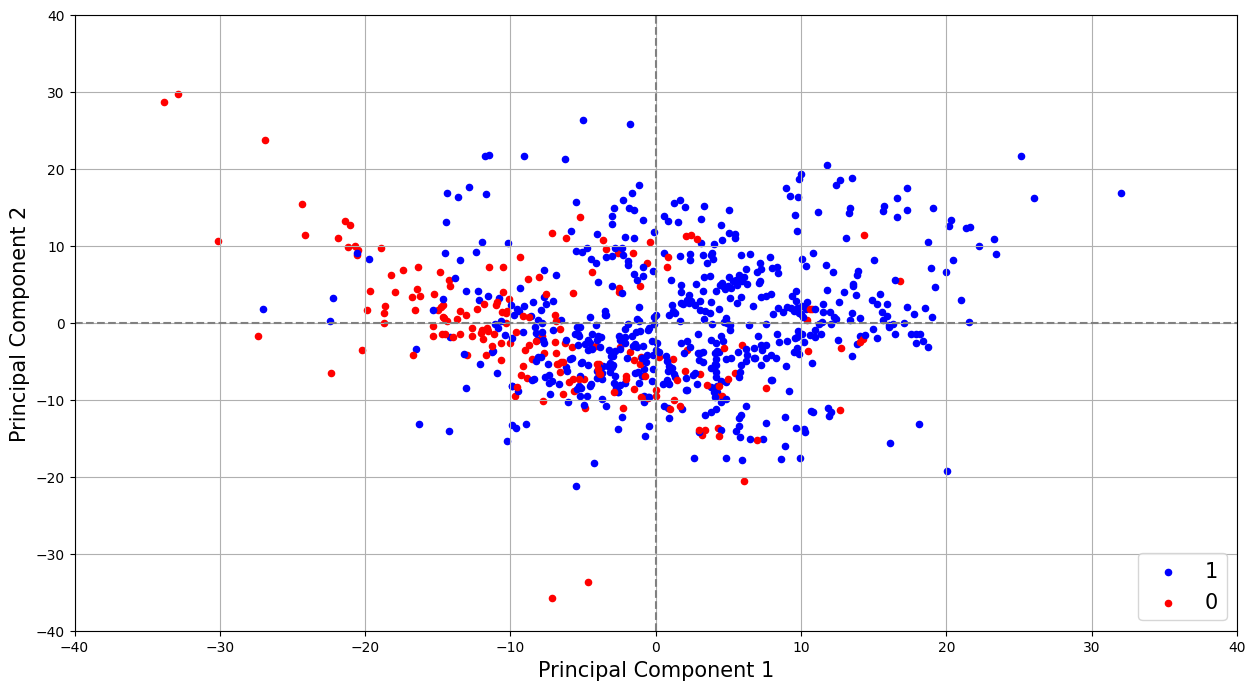

In [97]:
X = StandardScaler().fit_transform(X)
pca = PCA(n_components= 2)
result = pca.fit_transform(X)
pc1 = - result[:,0]
pc2 = - result[:,1]
plot_scatter(pc1, pc2)

# Save 200 main value and split to train test

In [100]:
pca = PCA(n_components= 200)
X = pca.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=256, random_state=25)
print(X.shape)

(756, 200)


# Fitting model logistic regression

In [99]:
logr = LogisticRegression(penalty="none")
logr.fit(X_train, Y_train)

y_pre = logr.predict(X_test)
print("test predict:\n", y_pre)
print("\n accuracy score:", accuracy_score(y_pre, Y_test))

test predict:
 [0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1
 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1
 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1]

 accuracy score: 0.7890625
